In [1]:
#Y = sin(X1 * 0.5 + X2^2 - X3 * X4) + log(|X5| + 1)
# X= 5 features
# Y=1 output

C:\Users\KRISHNENDU\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Prediction for test sample: [[0.976419]]


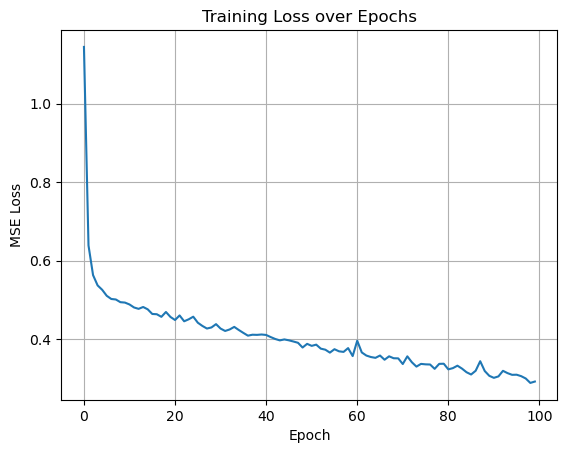

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate synthetic data
np.random.seed(42)
X = np.random.uniform(-5, 5, (1000, 5)).astype(np.float32)  # 1000 samples, 5 features

# Hidden function to generate Y (unknown to the model)
def complex_function(X):
    return (
        np.sin(X[:, 0] * 0.5 + X[:, 1]**2 - X[:, 2] * X[:, 3]) +
        np.log(np.abs(X[:, 4]) + 1)
    )

Y = complex_function(X).reshape(-1, 1).astype(np.float32)

# 2. Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 3. Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse')

# 4. Train the model
history = model.fit(X, Y, epochs=100, batch_size=32, verbose=0)

# 5. Evaluate and test
test_sample = np.array([[1, -2, 0.5, -1, 2]], dtype=np.float32)
predicted_y = model.predict(test_sample)
print("Prediction for test sample:", predicted_y)

# Optional: Plot training loss
plt.plot(history.history['loss'])
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()


In [5]:
# Example input: [x1, x2, x3, x4, x5]
input_data = np.array([[1.0, -2.0, 0.5, -1.0, 2.0]], dtype=np.float32)

# Predict
prediction = model.predict(input_data)

print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: [[0.976419]]
